In [21]:
from google.colab import files
files.upload = files.upload()

TypeError: 'dict' object is not callable

#Import all poackages

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Preprocessing

In [23]:
health_data = pd.read_csv('framingham.csv')
health_data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [24]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [25]:
health_data.isnull().sum()*100/len(health_data)

,0
male,0.000000
age,0.000000
education,2.477584
currentSmoker,0.000000
cigsPerDay,0.684285
BPMeds,1.250590
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179802


In [26]:
health_data = health_data.fillna(health_data.mean())
health_data.info()
health_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(4238, 16)

In [27]:
health_data=health_data.drop_duplicates()
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [28]:
X_label = health_data.drop(columns=['education','TenYearCHD'])
X_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


In [29]:
y_label = health_data['TenYearCHD']
y_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4238 entries, 0 to 4237
Series name: TenYearCHD
Non-Null Count  Dtype
--------------  -----
4238 non-null   int64
dtypes: int64(1)
memory usage: 33.2 KB


# Data split in test traim dataset

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_label,y_label,random_state=42)
y_train

,TenYearCHD
3076,0
1187,0
3259,0
2823,0
2031,1
...,...
3444,0
466,0
3092,0
3772,0


# Fit model

In [31]:

model = LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

# Data visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

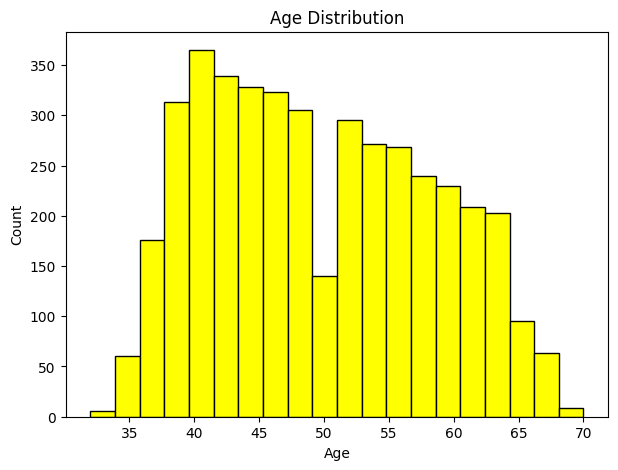

In [34]:
plt.figure(figsize=(7,5))
plt.hist(health_data['age'], bins=20,edgecolor='black',color='yellow')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

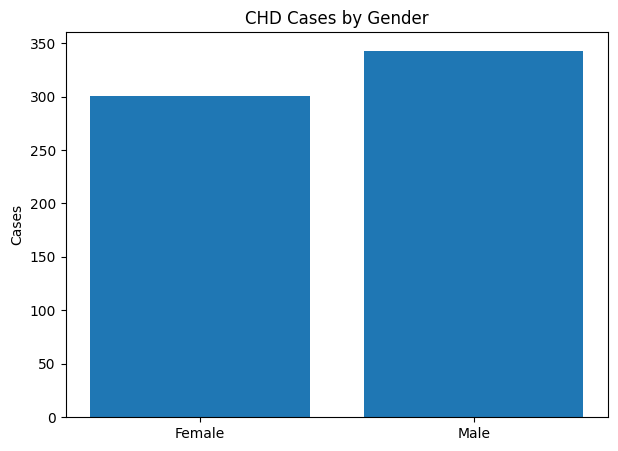

In [35]:
plt.figure(figsize=(7,5))
groups = health_data.groupby('male')['TenYearCHD'].sum()
plt.bar(['Female','Male'], groups)
plt.title("CHD Cases by Gender")
plt.ylabel("Cases")
plt.show()

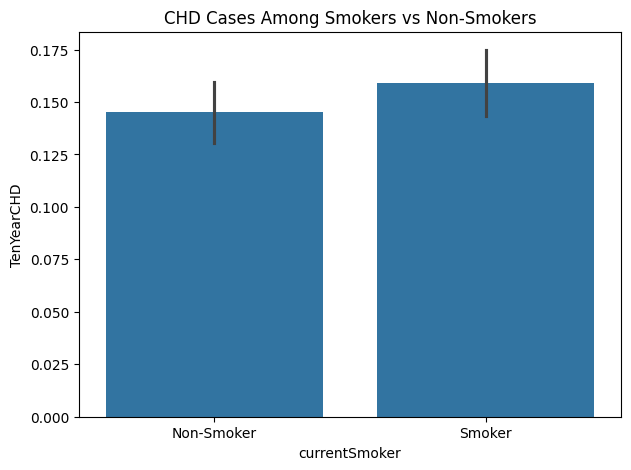

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(data=health_data, x='currentSmoker', y='TenYearCHD')
plt.xticks([0,1], ['Non-Smoker','Smoker'])
plt.title("CHD Cases Among Smokers vs Non-Smokers")
plt.show()

# Check accuracy

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[900,   8],
       [139,  13]])

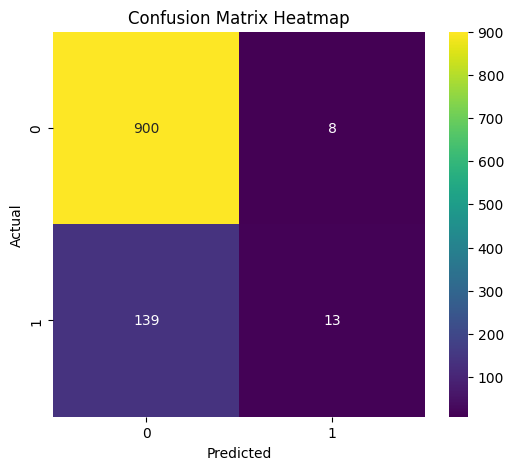

In [38]:
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")   # You can change cmap
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
print("Accuracy of model = ", accuracy_score(y_test,y_predict))

Accuracy of model =  0.8613207547169811


# Prediction

In [41]:
gender = int(input("Enter gender(0->female, 1->male): "))
age = int(input("Enter age: "))
current_smoker = int(input("Enter current smoker(0->no , 1->yes): "))
cigs_per_day = int(input("Enter number of cigarettes per day: "))
BPMeds = int(input("Enter if patient use BP Medicines (0-> no , 1-> yes )"))
prevalent_stroke = int(input("Enter if patient has prevalent stroke (0-> no , 1-> yes )"))
prevalent_hyp = int(input("Enter if patient has prevalent hypertension (0-> no , 1-> yes )"))
diabetes = int(input("Enter if patient has diabetes (0-> no , 1-> yes )"))
totChol = int(input("Enter total cholesterol: "))
sysBP = int(input("Enter systolic blood pressure: "))
diaBP = int(input("Enter diastolic blood pressure: "))
BMI = float(input("Enter BMI: "))
heart_rate = int(input("Enter heart rate: "))
glucose = int(input("Enter glucose level: "))

list = ['gender','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

result = model.predict([[gender,age,current_smoker,cigs_per_day,BPMeds,prevalent_stroke,prevalent_hyp,diabetes,totChol,sysBP,diaBP,BMI,heart_rate,glucose]])[0]
print(result)

if result == 1 :
  print("Patient is suffering from heart disease")
else :
  print("Patient is not suffering from heart disease")


Enter gender(0->female, 1->male): 1
Enter age: 40
Enter current smoker(0->no , 1->yes): 0
Enter number of cigarettes per day: 0
Enter if patient use BP Medicines (0-> no , 1-> yes )0
Enter if patient has prevalent stroke (0-> no , 1-> yes )0
Enter if patient has prevalent hypertension (0-> no , 1-> yes )0
Enter if patient has diabetes (0-> no , 1-> yes )0
Enter total cholesterol: 220
Enter systolic blood pressure: 80
Enter diastolic blood pressure: 60
Enter BMI: 25
Enter heart rate: 78
Enter glucose level: 140
0
Patient is not suffering from heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
